#**Preliminary Cells to Run**

In [ ]:
#mount to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#connecting to the wrangled file (take note that the read_csv code includes 'sep=";"')
import pandas as pd
df_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSVs/Kaggle_avg-joes_vs_critics.csv', sep=";")
df_main.head(5)

,Release,Release Date,Distributor,First_release_year,Second_release_year,Number_years,Domestic_gross,New_ranking,IMDB_mean,IMDB_median,IMDB_weighted_mean,Metacritic_critics_mean_score,Metacritic_critics_median_score,Metacritic_critics_weighted_score,Distance_critics_user,IMDB_mean_score_US,Metacritic_critics_mean_score_US,Distance_critics_user_US,IMDB_mean_score_males,IMDB_mean_score_females,IMDB_mean_score_<18,IMDB_mean_score_18-29,IMDB_mean_score_30-45,IMDB_mean_score_45+,link_boxoffice,link_IMDB,IMDB_general_sample,link_Metacritic
0,Avatar,dec 18,Twentieth Century Fox,2010,NaN,1,749766139,1,78,8,78,"83,85714286",88,83,"5,857142857",77,"84,41935484","7,419354839",78,77,77.0,77.0,78,79,rl876971521,tt0499549,1076942,avatar
1,Toy Story 3,jun 18,Walt Disney Studios Motion Pictures,2010,NaN,1,415004880,2,82,8,83,"90,33333333",90,92,"8,333333333",85,"90,51428571","5,514285714",83,83,82.0,84.0,83,81,rl1383564801,tt0435761,716752,toy-story-3
2,Alice in Wonderland,mar 5,Walt Disney Studios Motion Pictures,2010,NaN,1,334191110,3,66,7,64,"58,63157895",60,53,"7,368421053",63,"58,41176471","4,588235294",63,69,67.0,65.0,64,65,rl3393226241,tt1014759,368205,alice-in-wonderland
3,Iron Man 2,may 7,Paramount Pictures,2010,NaN,1,312433331,4,71,7,70,"60,075","61,5",57,"10,925",70,"60,72222222","9,277777778",69,72,68.0,70.0,69,70,rl1515881985,tt1228705,685506,iron-man-2
4,The Twilight Saga: Eclipse,jun 30,Summit Entertainment,2010,NaN,1,300531751,5,54,5,50,"61,18421053","61,5",58,"7,184210526",50,"61,17647059","11,17647059",45,58,NaN,49.0,48,52,rl659654145,tt1325004,217321,the-twilight-saga-eclipse


In [ ]:
#data cleaning #this applies to all numbers that used a comma in place of a decimal, e.g. 1000,35 is changed to 1000.35
df_main['Metacritic_critics_mean_score'] = (df_main['Metacritic_critics_mean_score'].replace(',','.', regex=True).astype(float))
df_main['Distance_critics_user'] = (df_main['Distance_critics_user'].replace(',','.', regex=True).astype(float))
df_main['Metacritic_critics_mean_score_US'] = (df_main['Metacritic_critics_mean_score_US'].replace(',','.', regex=True).astype(float))
df_main['Distance_critics_user_US'] = (df_main['Distance_critics_user_US'].replace(',','.', regex=True).astype(float))
df_main['Metacritic_critics_median_score'] = (df_main['Metacritic_critics_median_score'].replace(',','.', regex=True).astype(float))

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
#code to normalize domestic gross
normalized_gross = np.log(df_main.Domestic_gross)
df_main.insert(7, 'Normalized_Domestic_Gross', np.log(df_main.Domestic_gross))
#df_main.drop(['Normalized_Domestic_Gross'], axis=1, inplace=True) #<--- This is just to run the cell again
df_main.head()

,Release,Release Date,Distributor,First_release_year,Second_release_year,Number_years,Domestic_gross,Normalized_Domestic_Gross,New_ranking,IMDB_mean,IMDB_median,IMDB_weighted_mean,Metacritic_critics_mean_score,Metacritic_critics_median_score,Metacritic_critics_weighted_score,Distance_critics_user,IMDB_mean_score_US,Metacritic_critics_mean_score_US,Distance_critics_user_US,IMDB_mean_score_males,IMDB_mean_score_females,IMDB_mean_score_<18,IMDB_mean_score_18-29,IMDB_mean_score_30-45,IMDB_mean_score_45+,link_boxoffice,link_IMDB,IMDB_general_sample,link_Metacritic
0,Avatar,dec 18,Twentieth Century Fox,2010,NaN,1,749766139,20.435272,1,78,8,78,83.857143,88.0,83,5.857143,77,84.419355,7.419355,78,77,77.0,77.0,78,79,rl876971521,tt0499549,1076942,avatar
1,Toy Story 3,jun 18,Walt Disney Studios Motion Pictures,2010,NaN,1,415004880,19.843801,2,82,8,83,90.333333,90.0,92,8.333333,85,90.514286,5.514286,83,83,82.0,84.0,83,81,rl1383564801,tt0435761,716752,toy-story-3
2,Alice in Wonderland,mar 5,Walt Disney Studios Motion Pictures,2010,NaN,1,334191110,19.627224,3,66,7,64,58.631579,60.0,53,7.368421,63,58.411765,4.588235,63,69,67.0,65.0,64,65,rl3393226241,tt1014759,368205,alice-in-wonderland
3,Iron Man 2,may 7,Paramount Pictures,2010,NaN,1,312433331,19.559902,4,71,7,70,60.075000,61.5,57,10.925000,70,60.722222,9.277778,69,72,68.0,70.0,69,70,rl1515881985,tt1228705,685506,iron-man-2
4,The Twilight Saga: Eclipse,jun 30,Summit Entertainment,2010,NaN,1,300531751,19.521064,5,54,5,50,61.184211,61.5,58,7.184211,50,61.176471,11.176471,45,58,NaN,49.0,48,52,rl659654145,tt1325004,217321,the-twilight-saga-eclipse


### **Import Packages**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

### **Are the audeince scores normally distributed? What is the average score?**

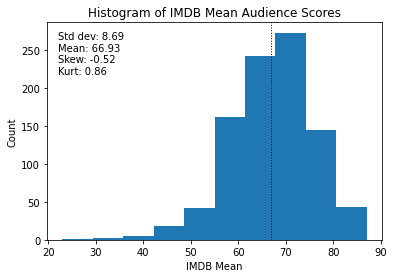

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.hist(df_main.IMDB_mean, bins = int(round(df_main.IMDB_mean.count()**(1/3),0)))
plt.title('Histogram of IMDB Mean Audience Scores')
plt.xlabel('IMDB Mean')
plt.ylabel('Count')
plt.axvline(df_main.IMDB_mean.mean(), color='k', linestyle='dotted', linewidth=1)
text  = 'Std dev: ' + str(round(df_main.IMDB_mean.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df_main.IMDB_mean.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df_main.IMDB_mean.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df_main.IMDB_mean.kurt(), 2))
plt.text(0.15, 0.7, text, fontsize=10, transform=plt.gcf().transFigure)
plt.show()

### **Are the critics scores normally distributed? What is the average score?**

In [ ]:
plt.hist(df_main.Metacritic_critics_mean_score, bins = int(round(df_main.Metacritic_critics_mean_score.count()**(1/3),0)))
plt.title("Histogram of Metacritic Critics' Mean Scores")
plt.xlabel('Metacritic Mean')
plt.ylabel('Count')
plt.axvline(df_main.Metacritic_critics_mean_score.mean(), color='k', linestyle='dotted', linewidth=1)
text  = 'Std dev: ' + str(round(df_main.Metacritic_critics_mean_score.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df_main.Metacritic_critics_mean_score.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df_main.Metacritic_critics_mean_score.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df_main.Metacritic_critics_mean_score.kurt(), 2))
plt.text(0.15, 0.7, text, fontsize=10, transform=plt.gcf().transFigure)
plt.show()

### **What is the average distance between the audience score and the critics score (Distance_critics_user) of any given movie?**

In [ ]:
plt.hist(df_main.Distance_critics_user, bins = int(round(df_main.Distance_critics_user.count()**(1/3),0)))
plt.title("Histogram of Mean Distance Between Audience and Critics' Scores")
plt.xlabel('Distance Mean')
plt.ylabel('Count')
plt.axvline(df_main.Distance_critics_user.mean(), color='k', linestyle='dotted', linewidth=1)
text  = 'Std dev: ' + str(round(df_main.Distance_critics_user.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df_main.Distance_critics_user.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df_main.Distance_critics_user.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df_main.Distance_critics_user.kurt(), 2))
plt.text(0.73, 0.7, text, fontsize=10, transform=plt.gcf().transFigure)
plt.show()

### **What is the average domestic box office? Is it normally distributed?**

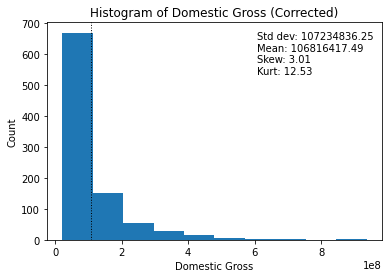

In [ ]:
plt.hist(df_main.Domestic_gross, bins = int(round(df_main.Domestic_gross.count()**(1/3),0)))
plt.title('Histogram of Domestic Gross (Corrected)')
plt.xlabel('Domestic Gross')
plt.ylabel('Count')
plt.axvline(df_main.Domestic_gross.mean(), color='k', linestyle='dotted', linewidth=1)
text  = 'Std dev: ' + str(round(df_main.Domestic_gross.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df_main.Domestic_gross.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df_main.Domestic_gross.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df_main.Domestic_gross.kurt(), 2))
plt.text(0.61, 0.7, text, fontsize=10, transform=plt.gcf().transFigure)
plt.show()

### **What is the normalized average domestic box office?**

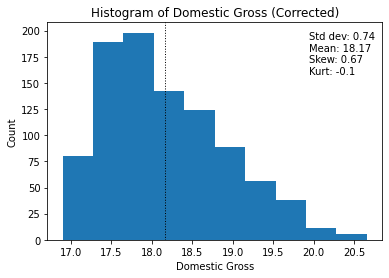

In [ ]:
Domestic_grossNormalized = np.log(df_main.Domestic_gross) # Correcting for high skew and kurt values
plt.hist(Domestic_grossNormalized, bins = int(round(Domestic_grossNormalized.count()**(1/3),0)))
plt.title('Histogram of Domestic Gross (Corrected)')
plt.xlabel('Domestic Gross')
plt.ylabel('Count')
plt.axvline(Domestic_grossNormalized.mean(), color='k', linestyle='dotted', linewidth=1)
text  = 'Std dev: ' + str(round(Domestic_grossNormalized.std(), 2)) + '\n'
text += 'Mean: ' + str(round(Domestic_grossNormalized.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(Domestic_grossNormalized.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(Domestic_grossNormalized.kurt(), 2))
plt.text(0.73, 0.7, text, fontsize=10, transform=plt.gcf().transFigure)
plt.show()

### **Is there a relationship between each distributor and domestic gross?**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


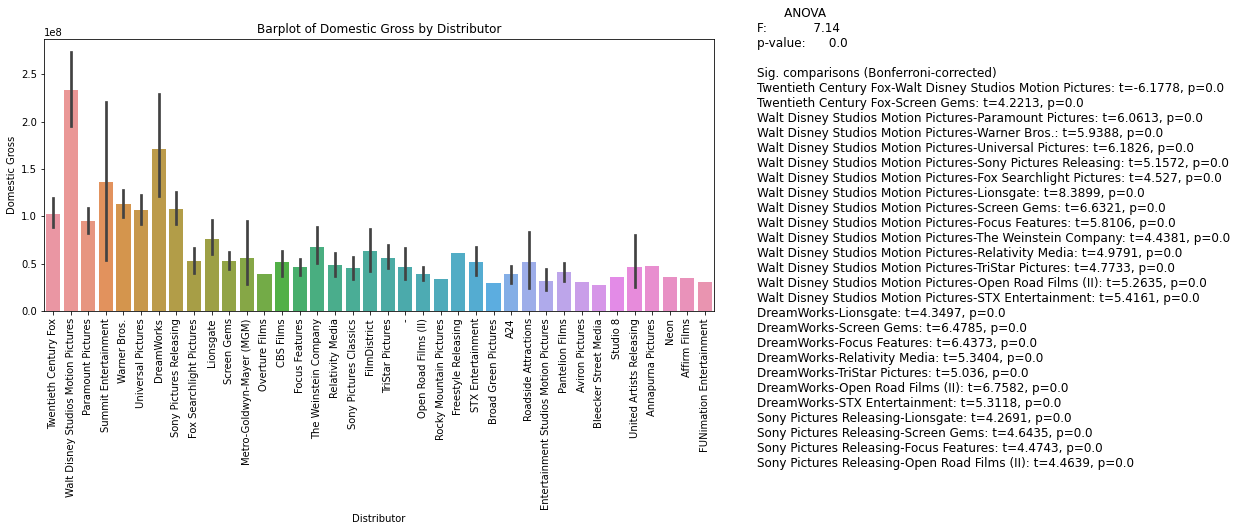

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(12, 5))
viz = sns.barplot(x=df_main['Distributor'], y=df_main['Domestic_gross']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=90);

plt.title("Barplot of Domestic Gross by Distributor")
plt.ylabel('Domestic Gross')

groups = df_main['Distributor'].unique()
group_labels = []
for g in groups:
  group_labels.append(df_main[df_main['Distributor'] == g]['Normalized_Domestic_Gross'])

oneway = stats.f_oneway(*group_labels)

ttests = []

for i, g in enumerate(groups): 
  for i2, g2 in enumerate(groups):
    if i2 > i: 
      type_1 = df_main[df_main['Distributor'] == g]
      type_2 = df_main[df_main['Distributor'] == g2]
      t, p = stats.ttest_ind(type_1['Normalized_Domestic_Gross'], type_2['Normalized_Domestic_Gross'])
      ttests.append([g, g2, t.round(4), p.round(4)])

p_threshold = 0.05 / len(ttests)

textstr  = '       ANOVA' + '\n'
textstr += 'F:            ' + str(oneway[0].round(2)) + '\n'
textstr += 'p-value:      ' + str(oneway[1].round(2)) + '\n\n'
textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'
for ttest in ttests:
  if ttest[3] <= p_threshold:
    textstr += ttest[0] + '-' + ttest[1] + ": t=" + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'

plt.text(0.95, -0.35, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

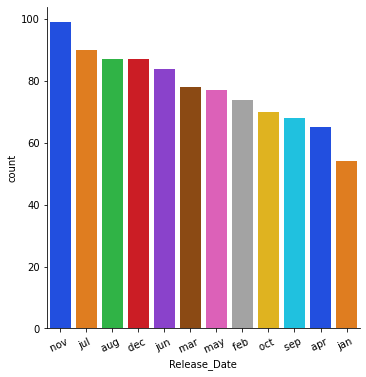

In [ ]:
# Replacing individual rankings with general categories (Top 10 being the most important)

df_JeffRank = df_main[['Release', 'Release Date', 'Distributor', 'First_release_year','New_ranking']]
df_JeffRank = df_JeffRank.rename(columns={'Release Date': 'Release_Date'})

df_JeffRank.replace(to_replace=[1,2,3,4,5,6,7,8,9,10], inplace= True, value='Top 10')
df_JeffRank.replace(to_replace=[11,12,13,14,15,16,17,18,19,20], inplace= True, value='11-20')
df_JeffRank.replace(to_replace=[21,22,23,24,25,26,27,28,29,30], inplace= True, value='21-30')
df_JeffRank.replace(to_replace=[31,32,33,34,35,36,37,38,39,40], inplace= True, value='31-40')
df_JeffRank.replace(to_replace=[41,42,43,44,45,46,47,48,49,50], inplace= True, value='41-50')
df_JeffRank.replace(to_replace=[51,52,53,54,55,56,57,58,59,60], inplace= True, value='51-60')
df_JeffRank.replace(to_replace=[61,62,63,64,65,66,67,68,69,70], inplace= True, value='61-70')
df_JeffRank.replace(to_replace=[71,72,73,74,75,76,77,78,79,80], inplace= True, value='71-80')
df_JeffRank.replace(to_replace=[81,82,83,84,85,86,87,88,89,90], inplace= True, value='81-90')
df_JeffRank.replace(to_replace=[91,92,93,94,95,96,97,98,99,100], inplace= True, value='91-100')

# Removing individual days from the release date so that I can display by month

df_JeffRank['Release_Date'] = df_JeffRank['Release_Date'].str.replace('\d+', '')

# Bar chart that shows count of Top 100 movie releases in descending order left to right

import seaborn as sns
import matplotlib.pyplot as plt
viz = sns.catplot(x="Release_Date", 
                  kind="count", palette="bright", data=df_JeffRank,order=df_JeffRank.Release_Date.value_counts().index);
viz.set_xticklabels(rotation=25)

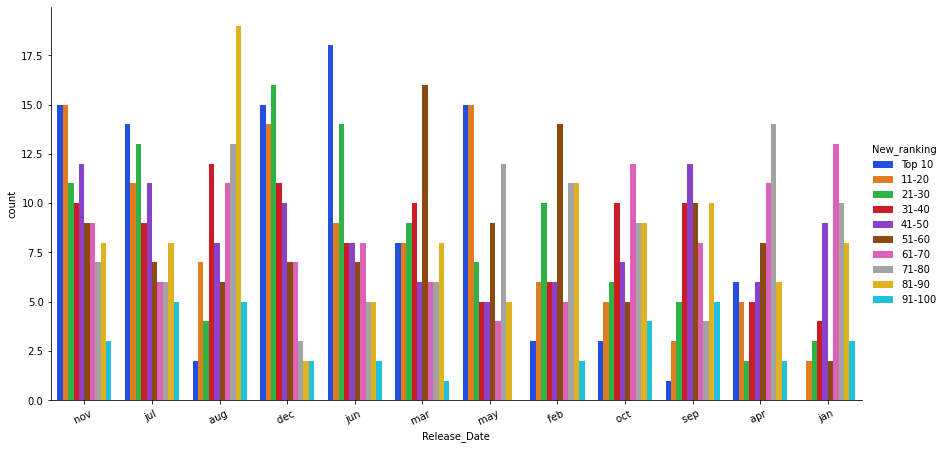

In [ ]:
# Bar chart that separates movie counts within each month by their percentile

import seaborn as sns
import matplotlib.pyplot as plt


viz = sns.catplot(x="Release_Date",hue="New_ranking", 
                  kind="count", palette="bright", data=df_JeffRank, order=df_JeffRank.Release_Date.value_counts().index, height=6, aspect=2);
viz.set_xticklabels(rotation=25);


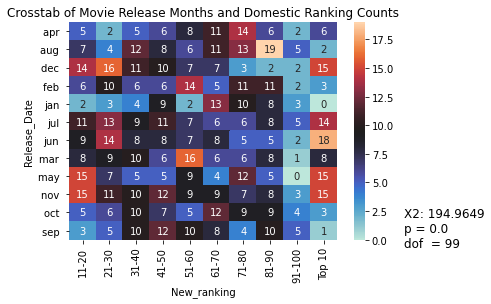

In [ ]:
# Heatmap that shows the same information demonstrated in the second bar chart

from scipy import stats
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt

crosstab = pd.DataFrame(pd.crosstab(df_JeffRank['Release_Date'], df_JeffRank['New_ranking']))

#Use the chi2_contingency to create the chi square, p, dof, and contingency table
X, p, dof, contingency_table = chi2_contingency(crosstab)

#create and plot the text that holds the chi square, p, and dof
textstr  = 'X2: ' + str(round(X, 4))+ '\n'
textstr += 'p = ' + str(round(p, 4)) + '\n'
textstr += 'dof  = ' + str(dof)
plt.text(0.9, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)

#plot the title
plt.title('Crosstab of Movie Release Months and Domestic Ranking Counts')

#create and plot heatmap that is passed the crosstab
sns.heatmap(crosstab, annot=True, fmt='d', cmap='icefire'); #coolwarm

### **Do certain distributors have more movies in the Top 10 ranking than others?**

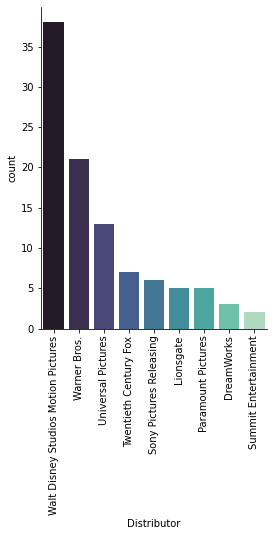

In [ ]:
# create new df that only includes data from Top 10 movies

df_Top10 = df_JeffRank[(df_JeffRank.New_ranking == 'Top 10')]

viz = sns.catplot(x="Distributor", 
                  kind="count", palette="mako", data=df_Top10 ,order=df_Top10.Distributor.value_counts().index);
viz.set_xticklabels(rotation=90)

### **Which distributor produces the most Top 100 movies?**

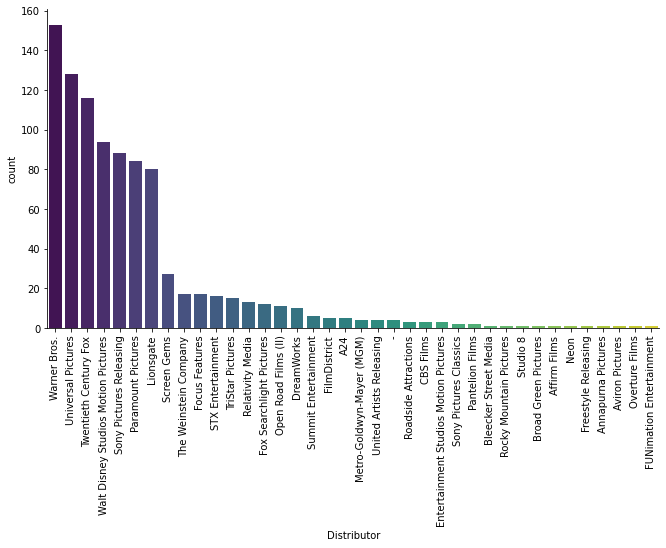

In [ ]:
# plt.figure(figsize=(12, 5))  <<<< This graph is frustrating because I can't get it to space out. Very difficult to read x-axis labels. 
                                    # Plenty of information for how to do it on a normal bar chart, but when it is a "catplot" bar chart, 
                                    # the same code doesn't seem to work
viz = sns.catplot(x="Distributor", 
                  kind="count", palette="viridis", data=df_JeffRank ,order=df_JeffRank.Distributor.value_counts().index, height=5, aspect=2);
viz.set_xticklabels(rotation=90)

### **Have the top ten distributors in release volume increased their releases per year over the last 10 years?**

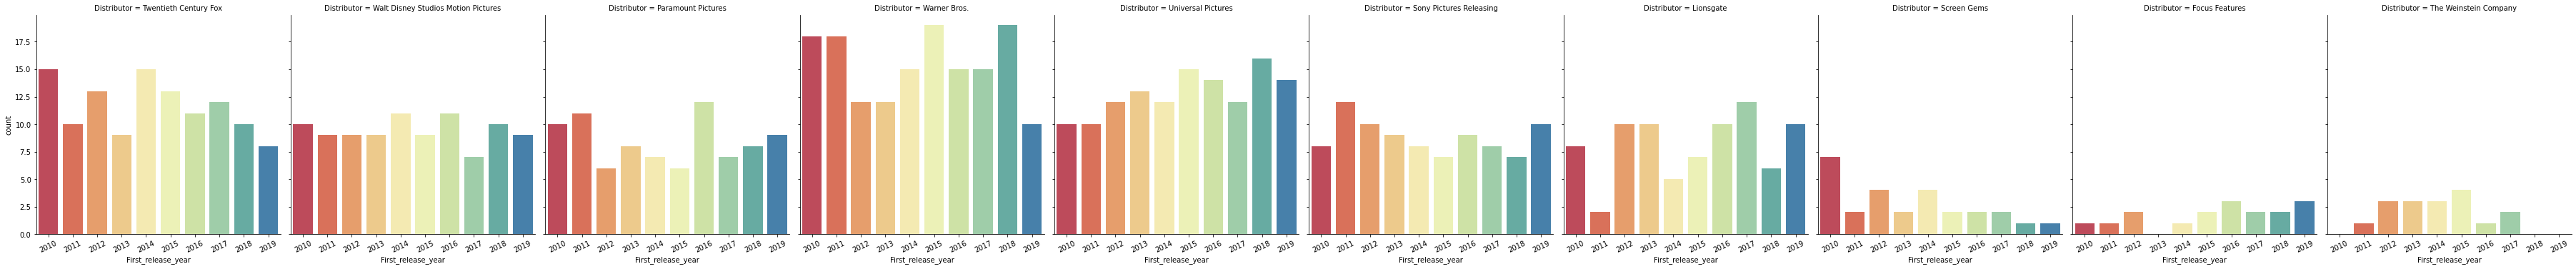

In [ ]:
Distr_Top10 = df_JeffRank[(df_JeffRank.Distributor == 'Warner Bros.') | (df_JeffRank.Distributor == 'Universal Pictures') | (df_JeffRank.Distributor == 'Twentieth Century Fox') | (df_JeffRank.Distributor == 'Walt Disney Studios Motion Pictures') | (df_JeffRank.Distributor == 'Sony Pictures Releasing') | (df_JeffRank.Distributor == 'Paramount Pictures') | (df_JeffRank.Distributor == 'Lionsgate') | (df_JeffRank.Distributor == 'Screen Gems') | (df_JeffRank.Distributor == 'The Weinstein Company') | (df_JeffRank.Distributor == 'Focus Features')]

viz = sns.catplot(x="First_release_year", col="Distributor",
                  kind="count", palette="Spectral", data=Distr_Top10);
viz.set_xticklabels(rotation=25);

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_main.head()

,Release,Release Date,Distributor,First_release_year,Second_release_year,Number_years,Domestic_gross,Normalized_Domestic_Gross,New_ranking,IMDB_mean,IMDB_median,IMDB_weighted_mean,Metacritic_critics_mean_score,Metacritic_critics_median_score,Metacritic_critics_weighted_score,Distance_critics_user,IMDB_mean_score_US,Metacritic_critics_mean_score_US,Distance_critics_user_US,IMDB_mean_score_males,IMDB_mean_score_females,IMDB_mean_score_<18,IMDB_mean_score_18-29,IMDB_mean_score_30-45,IMDB_mean_score_45+,link_boxoffice,link_IMDB,IMDB_general_sample,link_Metacritic
0,Avatar,dec 18,Twentieth Century Fox,2010,NaN,1,749766139,20.435272,1,78,8,78,83.857143,88.0,83,5.857143,77,84.419355,7.419355,78,77,77.0,77.0,78,79,rl876971521,tt0499549,1076942,avatar
1,Toy Story 3,jun 18,Walt Disney Studios Motion Pictures,2010,NaN,1,415004880,19.843801,2,82,8,83,90.333333,90.0,92,8.333333,85,90.514286,5.514286,83,83,82.0,84.0,83,81,rl1383564801,tt0435761,716752,toy-story-3
2,Alice in Wonderland,mar 5,Walt Disney Studios Motion Pictures,2010,NaN,1,334191110,19.627224,3,66,7,64,58.631579,60.0,53,7.368421,63,58.411765,4.588235,63,69,67.0,65.0,64,65,rl3393226241,tt1014759,368205,alice-in-wonderland
3,Iron Man 2,may 7,Paramount Pictures,2010,NaN,1,312433331,19.559902,4,71,7,70,60.075000,61.5,57,10.925000,70,60.722222,9.277778,69,72,68.0,70.0,69,70,rl1515881985,tt1228705,685506,iron-man-2
4,The Twilight Saga: Eclipse,jun 30,Summit Entertainment,2010,NaN,1,300531751,19.521064,5,54,5,50,61.184211,61.5,58,7.184211,50,61.176471,11.176471,45,58,NaN,49.0,48,52,rl659654145,tt1325004,217321,the-twilight-saga-eclipse


### **Which month(s) should distributors release movies, and which should they avoid?**

In [ ]:
#create empty list
release_month_list = []

#loop through the release date column and take the first 3 letters
for date in df_main['Release Date']:
  release_month_list.append(date[0:4])
release_month_list

#make a column that is populated by the values of the list; move new column right after "Release Date"
df_main.insert(2, 'Release Month', release_month_list)
df_main.head()

Text(0.5, 1.0, 'Release Month v Domestic Gross, 2010 - 2019')

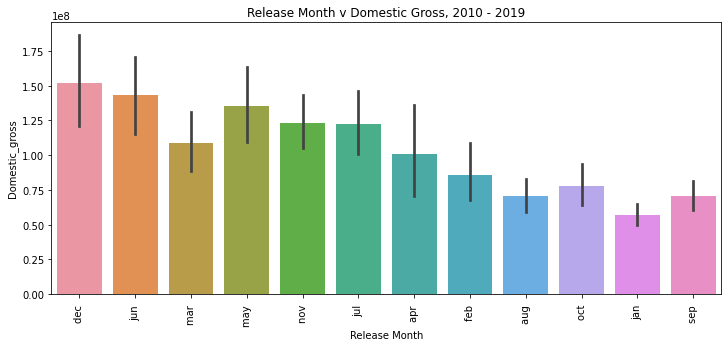

In [ ]:
#create a barplot to determine which release months perform the best in the box office,
# and which perform the worst

plt.figure(figsize=(12, 5)) #add sizing 
viz = sns.barplot(x=df_main['Release Month'], y=df_main['Domestic_gross']); #plot the barplot
viz.set_xticklabels(viz.get_xticklabels(), rotation=90); #slant column labels

#add a title
plt.title("Release Month v Domestic Gross, 2010 - 2019")

### **When do distributors tend to release their movies?**

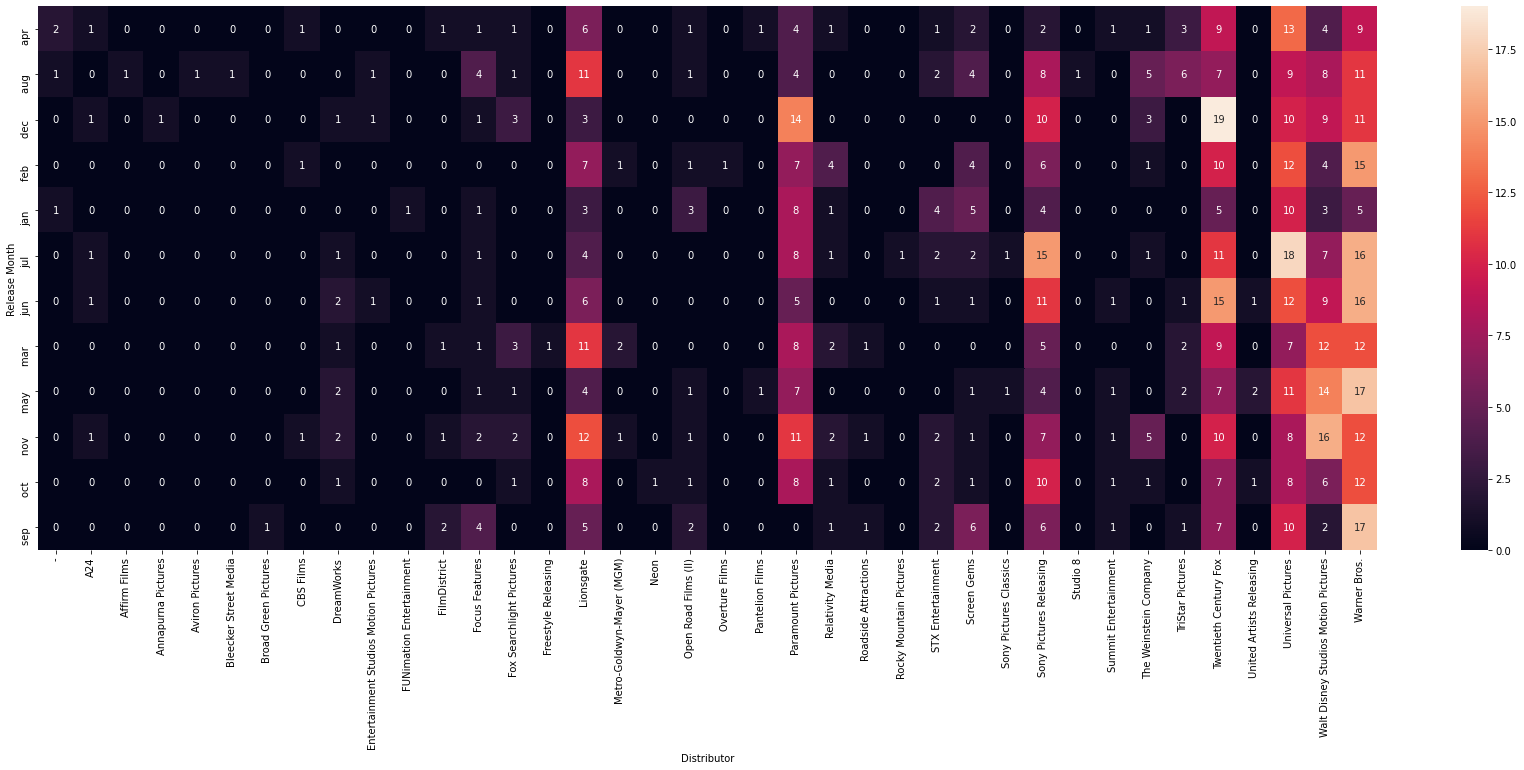

In [ ]:
#using a crosstab, show the months of the year crossed with distributors
fig,ax=plt.subplots(figsize=(30,10))
crosstab = pd.crosstab(df_main['Release Month'], df_main['Distributor'])
sns.heatmap(crosstab, annot=True, fmt='d');

In [ ]:
df_main["Distributor"].value_counts() #this was just to check if the crosstab above was correct

Warner Bros.                             153
Universal Pictures                       128
Twentieth Century Fox                    116
Walt Disney Studios Motion Pictures       94
Sony Pictures Releasing                   88
Paramount Pictures                        84
Lionsgate                                 80
Screen Gems                               27
The Weinstein Company                     17
Focus Features                            17
STX Entertainment                         16
TriStar Pictures                          15
Relativity Media                          13
Fox Searchlight Pictures                  12
Open Road Films (II)                      11
DreamWorks                                10
Summit Entertainment                       6
FilmDistrict                               5
A24                                        5
Metro-Goldwyn-Mayer (MGM)                  4
United Artists Releasing                   4
-                                          4
Roadside A

In [ ]:
df_main["Release Month"].value_counts() #this is to see if most movies were released in what we established earlier as the "most profitable months"

nov     99
jul     90
aug     87
dec     87
jun     84
mar     78
may     77
feb     74
oct     70
sep     68
apr     65
jan     54
Name: Release Month, dtype: int64

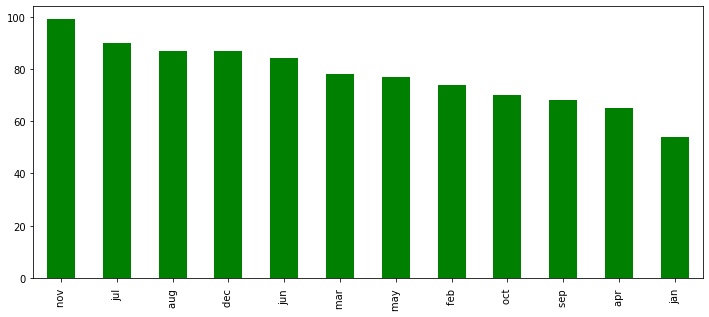

In [ ]:
#visualizing the cell above
df_main['Release Month'].value_counts().plot(kind='bar', color='green', figsize=(12,5))

From the chart above, we see that interestingly enough, though December and June are by far the largest money-making months, they rank 4th and 5th on the list. It's possible that the largest number of movies are released in november to prepare for the december box office. What else is interesting, is that August ranks 3rd, even though we have seen that movies released in august tend to perform poorly in the box office.

### **Do movies that are released over more than 1 box office year have a higher average domestic gross?**

**from the dataset on kaggle:**
"If a movie appears in two Box Office years 
(e.g. if a movie plays from Dec 2012 - March 2013), 
their gross is aggregated and the movie is said to 
be released during the *first *year it appears in 
the data (e.g. 2012)"

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

df_main['Number_years'].value_counts()

1    867
2     66
Name: Number_years, dtype: int64

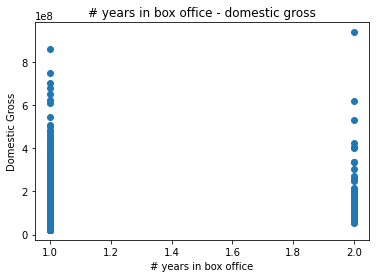

r = 0.184
p = 0.0


In [ ]:
df_main_s = df_main

#Imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#Plot Scatterplot --> plt.scatter(x axis variable, y axis variable)
plt.scatter(df_main_s['Number_years'], df_main_s['Domestic_gross'])

#Create title --> plt.title('Title Name')
plt.title('# years in box office - domestic gross')

#Create X Label --> plt.xlabel('x label name')
plt.xlabel('# years in box office')

#Create Y Label --> plt.ylabel('y label name')
plt.ylabel('Domestic Gross')

#Show Plot and clear settings --> plt.show()
plt.show()

#Generate r correlation and p-value --> correlation variable = stats.pearsonr(x variable, y variable)
#x variable is the feature variable or independent variable. y variable is the label or depended variable.
corr = stats.pearsonr(df_main_s['Number_years'], df_main_s['Domestic_gross'])

#Print out r. R is in the 0 index of the corr list. Cast to string and round.
print('r = ' + str(round(corr[0], 4)))

#Print out the p-value. The p-value is in the 1st index of the corr list. Cast to string and round.
print('p = ' + str(round(corr[1], 4)))

In [ ]:
#filtering dataframe into two different dfs based on num yrs in box office
df_1yr = df_main[df_main.Number_years == 1]
df_2years = df_main[df_main.Number_years == 2]

#df_1yr.head()
df_2years.head()

,Release,Release Date,Release Month,Distributor,First_release_year,Second_release_year,Number_years,Domestic_gross,Normalized_Domestic_Gross,New_ranking,IMDB_mean,IMDB_median,IMDB_weighted_mean,Metacritic_critics_mean_score,Metacritic_critics_median_score,Metacritic_critics_weighted_score,Distance_critics_user,IMDB_mean_score_US,Metacritic_critics_mean_score_US,Distance_critics_user_US,IMDB_mean_score_males,IMDB_mean_score_females,IMDB_mean_score_<18,IMDB_mean_score_18-29,IMDB_mean_score_30-45,IMDB_mean_score_45+,link_boxoffice,link_IMDB,IMDB_general_sample,link_Metacritic
13,Tangled,nov 24,nov,Walt Disney Studios Motion Pictures,2010,2011.0,2,200821936,19.117929,14,79,8,77,"73,17647059",75,71,"5,823529412",78,"72,7","5,3",76,81,75.0,79.0,77,76,rl980256257,tt0398286,382023,tangled
15,TRON: Legacy,dec 17,dec,Walt Disney Studios Motion Pictures,2010,2011.0,2,172062763,18.963370,16,69,7,68,54,50,49,15,69,"53,30555556","15,69444444",68,67,NaN,68.0,68,66,rl4000810497,tt1104001,303124,tron-legacy
16,True Grit,dec 22,dec,Paramount Pictures,2010,2011.0,2,171243005,18.958594,17,77,8,76,"80,41463415",80,80,"3,414634146",78,"79,97297297","1,972972973",76,75,NaN,153.0,76,76,rl3564602881,tt1403865,293864,true-grit
19,Little Fockers,dec 22,dec,Universal Pictures,2010,2011.0,2,148438600,18.815682,20,56,6,55,"33,96875",38,27,"22,03125",53,"33,42857143","19,57142857",54,56,NaN,56.0,54,53,rl929203713,tt0970866,102080,little-fockers
28,Black Swan,dec 03,dec,Fox Searchlight Pictures,2010,2011.0,2,106954678,18.487916,29,79,8,80,"78,78571429",80,79,"0,214285714",80,"78,5","1,5",80,80,NaN,81.0,80,75,rl2286388737,tt0947798,668540,black-swan


In [ ]:
# it looks like on average, movies that were out for a second box office year performed better in the domestic box office
print(round(df_1yr['Domestic_gross'].mean(), 2))
print(round(df_2years['Domestic_gross'].mean(), 2))

101375363.5
178292081.27


### **How does performance among critics compare with performance in the box office?**

In [ ]:
from scipy import stats
import pandas as pd

corr = stats.pearsonr(df_main.Metacritic_critics_weighted_score, df_main.Normalized_Domestic_Gross)
corr
print('r: \t' + str(round(corr[0], 4))) 
print('p-value:' + str(round(corr[1], 4)))

r: 	0.3216
p-value:0.0


Text(0.5, 1.0, 'Metacritic Score v Domestic Gross, 2010')

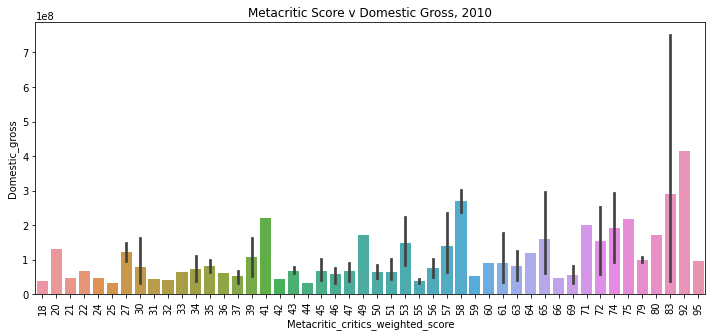

In [ ]:
df_2010 = df_main[df_main.First_release_year == 2010]

plt.figure(figsize=(12, 5)) #add sizing 
viz = sns.barplot(x=df_2010['Metacritic_critics_weighted_score'], y=df_2010['Domestic_gross']); #plot the barplot
viz.set_xticklabels(viz.get_xticklabels(), rotation=90); #slant column labels

plt.title("Metacritic Score v Domestic Gross, 2010")

Text(0.5, 1.0, 'Metacritic Score v Domestic Gross, 2018')

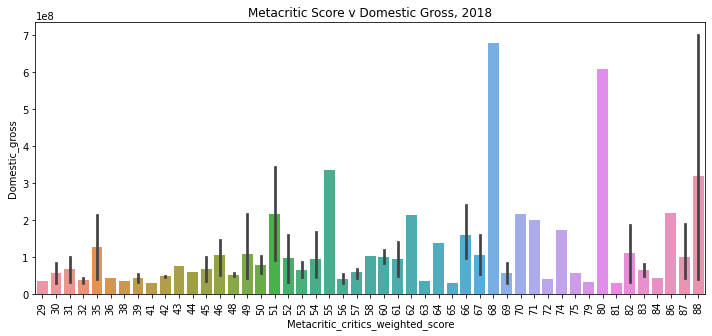

In [ ]:
df_2018 = df_main[df_main.First_release_year==2018]
plt.figure(figsize=(12, 5)) #add sizing 
viz = sns.barplot(x=df_2018['Metacritic_critics_weighted_score'], y=df_2018['Domestic_gross']); #plot the barplot
viz.set_xticklabels(viz.get_xticklabels(), rotation=90); #slant column labels

plt.title("Metacritic Score v Domestic Gross, 2018")

In [ ]:
plt.figure(figsize=(12, 5)) #add sizing 
viz = sns.barplot(x=df_main['IMDB_median'], y=df_main['Domestic_gross']); #plot the barplot
viz.set_xticklabels(viz.get_xticklabels(), rotation=90); #slant column labels

plt.title("Metacritic Score v Domestic Gross, 2010-2019")

### **Which distributors perform best among critics?**

Text(0.5, 1.0, 'Metacritic Score by Distributor')

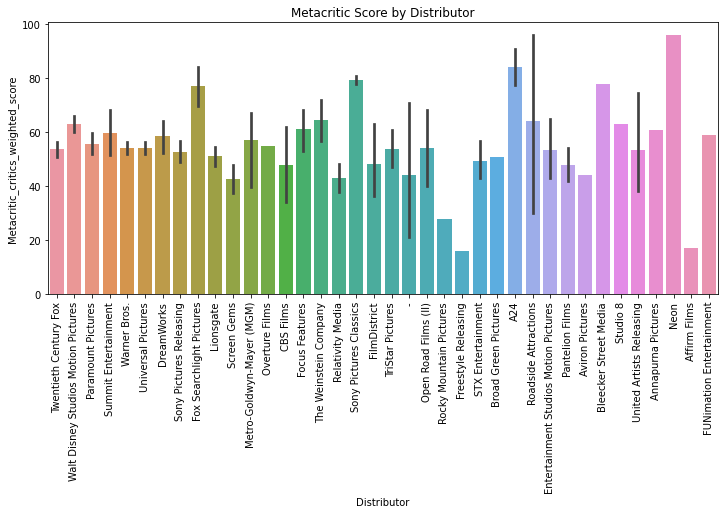

In [ ]:
#Tyler Curtis's Work/Questions
df_Tyler = df_main
df_2010 = df_main[df_main.First_release_year==2010]

#which year has seen the highest domestic box office?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5)) #add sizing 
viz = sns.barplot(x=df_main['Distributor'], y=df_main['Metacritic_critics_weighted_score']); #plot the barplot
viz.set_xticklabels(viz.get_xticklabels(), rotation=90); #slant column labels

plt.title("Metacritic Score by Distributor")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_2018 = df_main[df_main.First_release_year==2018]

plt.figure(figsize=(12, 5)) #add sizing 
viz = sns.barplot(x=df_2018['Distributor'], y=df_2018['Metacritic_critics_weighted_score']); #plot the barplot
viz.set_xticklabels(viz.get_xticklabels(), rotation=90); #slant column labels

plt.title("Metacritic Score by Distributor, 2018")

In [ ]:
#Generate Numeric Date variable
new = df_main['Release Date'].str.split(" ", n = 1, expand = True)
df_main['Month'] = new[0]
df_main['Day'] = new[1]

numericMonth = []

i = 0
for string in df_main['Month']:
  if string == 'jan':
    numericMonth.append(1)
  elif string == 'feb':
    numericMonth.append(2)
  elif string == 'mar':
    numericMonth.append(3)
  elif string == 'apr':
    numericMonth.append(4)
  elif string == 'may':
    numericMonth.append(5)
  elif string == 'jun':
    numericMonth.append(6)
  elif string == 'jul':
    numericMonth.append(7)
  elif string == 'aug':
    numericMonth.append(8)
  elif string == 'sep':
    numericMonth.append(9)
  elif string == 'oct':
    numericMonth.append(10)
  elif string == 'nov':
    numericMonth.append(11)
  elif string == 'dec':
    numericMonth.append(12)

i += 1

df_main['Numeric Month'] = numericMonth

#String -> Float Date

stringDate = df_main['Numeric Month'].astype(str) + '.' + df_main['Day'].astype(str)
df_main.stringDate = stringDate
df_main['New Date'] = df_main.stringDate.astype(float)

df_main.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,Release,Release Date,Release Month,Distributor,First_release_year,Second_release_year,Number_years,Domestic_gross,Normalized_Domestic_Gross,New_ranking,IMDB_mean,IMDB_median,IMDB_weighted_mean,Metacritic_critics_mean_score,Metacritic_critics_median_score,Metacritic_critics_weighted_score,Distance_critics_user,IMDB_mean_score_US,Metacritic_critics_mean_score_US,Distance_critics_user_US,IMDB_mean_score_males,IMDB_mean_score_females,IMDB_mean_score_<18,IMDB_mean_score_18-29,IMDB_mean_score_30-45,IMDB_mean_score_45+,link_boxoffice,link_IMDB,IMDB_general_sample,link_Metacritic,Month,Day,Numeric Month,New Date
0,Avatar,dec 18,dec,Twentieth Century Fox,2010,NaN,1,749766139,20.435272,1,78,8,78,"83,85714286",88,83,"5,857142857",77,"84,41935484","7,419354839",78,77,77.0,77.0,78,79,rl876971521,tt0499549,1076942,avatar,dec,18,12,12.18
1,Toy Story 3,jun 18,jun,Walt Disney Studios Motion Pictures,2010,NaN,1,415004880,19.843801,2,82,8,83,"90,33333333",90,92,"8,333333333",85,"90,51428571","5,514285714",83,83,82.0,84.0,83,81,rl1383564801,tt0435761,716752,toy-story-3,jun,18,6,6.18
2,Alice in Wonderland,mar 5,mar,Walt Disney Studios Motion Pictures,2010,NaN,1,334191110,19.627224,3,66,7,64,"58,63157895",60,53,"7,368421053",63,"58,41176471","4,588235294",63,69,67.0,65.0,64,65,rl3393226241,tt1014759,368205,alice-in-wonderland,mar,5,3,3.50
3,Iron Man 2,may 7,may,Paramount Pictures,2010,NaN,1,312433331,19.559902,4,71,7,70,"60,075","61,5",57,"10,925",70,"60,72222222","9,277777778",69,72,68.0,70.0,69,70,rl1515881985,tt1228705,685506,iron-man-2,may,7,5,5.70
4,The Twilight Saga: Eclipse,jun 30,jun,Summit Entertainment,2010,NaN,1,300531751,19.521064,5,54,5,50,"61,18421053","61,5",58,"7,184210526",50,"61,17647059","11,17647059",45,58,NaN,49.0,48,52,rl659654145,tt1325004,217321,the-twilight-saga-eclipse,jun,30,6,6.30


In [ ]:
#Dropping redundant variables

del df_main['Month']
del df_main['Day']
del df_main['Numeric Month']

df_main.head()

In [ ]:
#Dropping missing observations
df_main.dropna

#Dropping columns with missing data (not important for this analysis)
del df_main['IMDB_mean_score_<18']
del df_main['IMDB_mean_score_18-29']
del df_main['Second_release_year']

In [ ]:
#Numeric Multivariate Regression. Looking for Domestic Gross ranking
#as explained by various movie review methods and date.

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set label and features
y = df_main['New_ranking']
X = df_main.select_dtypes(np.number).assign(const=1)  # drop all categorical features and allow y-intercept to vary
X = X.drop(columns=['New_ranking', 'Domestic_gross', 'Number_years', 'First_release_year'])

# Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# View results
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:            New_ranking   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     917.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:07:01   Log-Likelihood:                -3203.8
No. Observations:                 933   AIC:                             6434.
Df Residuals:                     920   BIC:                             6496.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Normal

In [ ]:
#Import/Install for 3D Visualization
import plotly.express as px

In [ ]:
#Numeric Visualization
danieNumeric3D = px.scatter_3d(df_main, x='New Date', y='IMDB_weighted_mean', z='Metacritic_critics_weighted_score', color = 'Domestic_gross', opacity = .5)
danieNumeric3D.show()

In [ ]:
#Generate categorical variable for quarter
quarter = []

i = 0
for date in df_main['New Date']:
  if date < 3.32:
    quarter.append('Q1')
  elif 3.32 < date < 6.32:
    quarter.append('Q2')
  elif 6.32 < date < 9.32:
    quarter.append('Q3')
  elif date > 9.32:
    quarter.append('Q4')

i += 1

df_main['Quarter'] = quarter

df_main.head()

In [ ]:
#Generate categorical variable for "Top 10" ranking for year

topTen = []

i = 0
for rank in df_main['New_ranking']:
  if rank <= 10:
    topTen.append(1)
  else:
    topTen.append(0)

i += 1

df_main['Top Ten'] = topTen

In [ ]:
# Categorical Multivariate Visualization
danieCategorical3D = px.scatter_3d(df_main, x='Quarter', y='IMDB_mean', z='Metacritic_critics_mean_score', color = 'Top Ten', opacity = .5)
danieCategorical3D.show()